# Email Spam and Ham Detection

This is a spam detection notebook using the Ham and Spam email dataset from SpamAssassin.
The dataset contains over 3,000 emails, with labels indicating whether they are ham or spam. Using machine learning algorithms, I'm exploring ways to accurately classify emails and identify potential spam messages. 

In this notebook, I have primarily tried working with Naive Bayes methodology, and got about 98% accuracy.

In [1]:
import pandas as pd
import numpy as np
import os
import opendatasets as od
from pathlib import Path

In [2]:
file_present = True
datapath = Path()
datapath.mkdir(parents=True, exist_ok=True)
for filename in ("ham", "spam"):
    if not (datapath / filename).is_dir():
        file_present = False

# below code requires Kaggle Credentials, so follow the following steps to get them
# opendatasets uses the Kaggle Official API for donwloading dataset from Kaggle. Follow these steps to find your API credentials:
# Step 1: Go to https://kaggle.com/me/account (sign in if required).
# Step 2: Scroll down to the "API" section and click "Create New API Token". This will download a file kaggle.json with the following contents:
# {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
# Step 3: When you run opendatsets.download, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.
if not file_present:
    od.download("https://www.kaggle.com/datasets/veleon/ham-and-spam-dataset")

In [3]:
# Check given traning examples
print("Spam Data:", len(os.listdir('spam')))
print("Ham Data:", len(os.listdir('ham')))

Spam Data: 501
Ham Data: 2551


In [4]:
import nltk
import re

nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to C:\Users\Young
[nltk_data]     Gun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Young
[nltk_data]     Gun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
mails = []
labels = []

for label in ['spam', 'ham'] :
    
    f_name  = os.listdir(label)
    
    for name in f_name :
        f = open((label +'/'+ name), 'r', encoding = 'latin-1')
        bolk = f.read()
        mails.append(bolk)
        labels.append(label)
        
        
df = pd.DataFrame({'emails' : mails, 'label':labels})

In [6]:
df.head()

,emails,label
0,mv 1 00001.bfc8d64d12b325ff385cca8d07b84288\nm...,spam
1,From 12a1mailbot1@web.de Thu Aug 22 13:17:22 ...,spam
2,From ilug-admin@linux.ie Thu Aug 22 13:27:39 ...,spam
3,From sabrina@mx3.1premio.com Thu Aug 22 14:44...,spam
4,From wsup@playful.com Thu Aug 22 16:17:00 200...,spam


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [8]:
df['emails'] = df['emails'].apply(lambda x : x.lower())

In [9]:
df

,emails,label
0,mv 1 00001.bfc8d64d12b325ff385cca8d07b84288\nm...,1
1,from 12a1mailbot1@web.de thu aug 22 13:17:22 ...,1
2,from ilug-admin@linux.ie thu aug 22 13:27:39 ...,1
3,from sabrina@mx3.1premio.com thu aug 22 14:44...,1
4,from wsup@playful.com thu aug 22 16:17:00 200...,1
...,...,...
3047,from rssfeeds@jmason.org thu oct 10 12:32:30 ...,0
3048,from rssfeeds@jmason.org thu oct 10 12:32:31 ...,0
3049,from rssfeeds@jmason.org thu oct 10 12:32:32 ...,0
3050,from rssfeeds@jmason.org thu oct 10 12:32:34 ...,0


In [10]:
df['emails'] = df['emails'].apply(lambda x:x.replace('\n',''))
df['emails'] = df['emails'].apply(lambda x:x.replace('\t',''))

In [11]:
df['emails'][3]

'from sabrina@mx3.1premio.com  thu aug 22 14:44:07 2002return-path: <sabrina@mx3.1premio.com>delivered-to: zzzz@localhost.example.comreceived: from localhost (localhost [127.0.0.1])by phobos.labs.example.com (postfix) with esmtp id 1e90847c66for <zzzz@localhost>; thu, 22 aug 2002 09:44:02 -0400 (edt)received: from mail.webnote.net [193.120.211.219]by localhost with pop3 (fetchmail-5.9.0)for zzzz@localhost (single-drop); thu, 22 aug 2002 14:44:03 +0100 (ist)received: from email.qves.com (email1.qves.net [209.63.151.251] (may be forged))by webnote.net (8.9.3/8.9.3) with esmtp id oaa04953for <zzzz@example.com>; thu, 22 aug 2002 14:37:23 +0100received: from qvp0086 ([169.254.6.17]) by email.qves.com with microsoft smtpsvc(5.0.2195.2966); thu, 22 aug 2002 07:36:20 -0600from: "slim down" <sabrina@mx3.1premio.com>to: <zzzz@example.com>subject: guaranteed to lose 10-12 lbs in 30 days                          11.150date: thu, 22 aug 2002 07:36:19 -0600message-id: <9a63c01c249e0$e5a9d610$1106fea

In [12]:
lemm = WordNetLemmatizer()
processed_text = []

for i in range(len(df)) :
    text = re.sub('^a-zA-z',' ',df['emails'][i])
    words = text.split()
    words = [lemm.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    text_p = ' '.join(words)
    processed_text.append(text_p)

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(processed_text).toarray()

In [14]:
y = df['label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [17]:
model.fit(X_train,y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9852700490998363

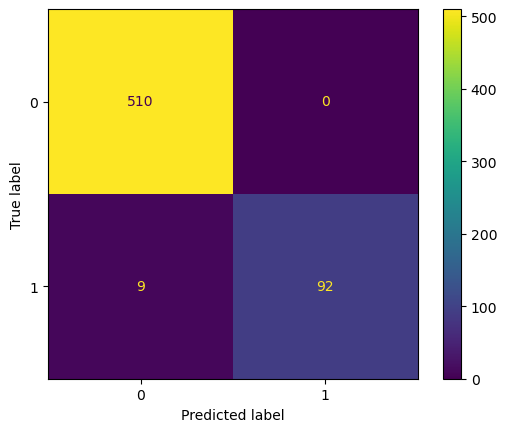

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()